# P3 - Group 2

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Meter A
Contains 87 instances of physical diagnostic parameters for an 8-path liquid USM. It
has 37 attributes(features) and 2 classes or health states: \
(1) -- Flatness ratio \
(2) -- Symmetry \
(3) -- Crossflow \
(4)-(11) -- Flow velocity in each of the eight paths \
(12)-(19) -- Speed of sound in each of the eight paths \
(20) -- Average speed of sound in all eight paths \
(21)-(36) -- Gain at both ends of each of the eight paths \
(37) -- Class attribute or health state of meter: 1,2 \
Class '1' - Healthy \
Class '2' - Installation effects 

In [51]:
meter_a_df = pd.read_csv("./dataset/Meter A", sep="\t", header=None)
meter_a_df.columns = ['Flatness Ratio',
                      'Symmetry',
                      'Crossflow',
                      'Flow Velocity 1',
                      'Flow Velocity 2',
                      'Flow Velocity 3',
                      'Flow Velocity 4',
                      'Flow Velocity 5',
                      'Flow Velocity 6',
                      'Flow Velocity 7',
                      'Flow Velocity 8',
                      'Speed of Sound 1',
                      'Speed of Sound 2',
                      'Speed of Sound 3',
                      'Speed of Sound 4',
                      'Speed of Sound 5',
                      'Speed of Sound 6',
                      'Speed of Sound 7',
                      'Speed of Sound 8',
                      'Average Speed of Sound',
                      'Gain at both ends 1',
                      'Gain at both ends 2',
                      'Gain at both ends 3',
                      'Gain at both ends 4',
                      'Gain at both ends 5',
                      'Gain at both ends 6',
                      'Gain at both ends 7',
                      'Gain at both ends 8',
                      'Gain at both ends 9',
                      'Gain at both ends 10',
                      'Gain at both ends 11',
                      'Gain at both ends 12',
                      'Gain at both ends 13',
                      'Gain at both ends 14',
                      'Gain at both ends 15',
                      'Gain at both ends 16',
                      'Class Attribute/Health State']
# replace
meter_a_df


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,Flow Velocity 8,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 5,Speed of Sound 6,Speed of Sound 7,Speed of Sound 8,Average Speed of Sound,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16,Class Attribute/Health State
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,8.631366,1485.528500,1485.454000,1485.437500,1485.354167,1485.468167,1485.450667,1484.928167,1485.508667,1485.391229,34.570313,33.505860,36.702475,37.130537,35.323895,35.594078,34.375000,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,7.674046,1486.042333,1485.992833,1485.973333,1485.867833,1485.990333,1485.992167,1485.466667,1486.033667,1485.919896,34.318033,33.429360,36.682942,37.080077,35.294598,35.511068,34.103190,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,6.660930,1486.023667,1485.980833,1485.960000,1485.850500,1485.963667,1485.979500,1485.454667,1486.012333,1485.903146,34.187827,33.419598,36.671552,37.005207,35.275065,35.472005,33.917643,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,5.645545,1484.898000,1484.872000,1484.852333,1484.739000,1484.849333,1484.872000,1484.344500,1484.900333,1484.790938,34.041342,33.403320,36.682942,36.936850,35.276693,35.444337,33.763022,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,5.660944,1484.361333,1484.331833,1484.313833,1484.205000,1484.307500,1484.331833,1483.807667,1484.364000,1484.252875,34.044597,33.382162,36.691080,36.949872,35.275065,35.441082,33.754882,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,2.680925,1484.752667,1484.728333,1484.707833,1484.593000,1484.696500,1484.726333,1484.202833,1484.754833,1484.645292,33.660483,33.370770,36.692708,36.759440,35.201823,35.276693,33.173827,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,2.705791,1484.689000,1484.664500,1484.644667,1484.529333,1484.633167,1484.662167,1484.140000,1484.691667,1484.581813,33.673503,33.375653,36.689453,36.756185,35.188802,35.278322,33.175458,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,2.684454,1484.638167,1484.612667,1484.594167,1484.478333,1484.581667,1484.610333,1484.087833,1484.641500,1484.530583,33.676758,33.378907,36.695963,36.764323,35.200197,35.283202,33.172200,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2
85,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,2.687601,1484.580167,1484.555833,1484.537000,1484.422667,1484.524333,1484.554167,1484.032000,1484.5851

In [52]:
#Get average values
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 90)
velocity = meter_a_df.loc[: , 'Flow Velocity 1':'Flow Velocity 8']
gain = meter_a_df.loc[: , 'Gain at both ends 1':'Gain at both ends 15']
meter_a_df['Average Velocity'] = velocity.mean(axis=1)
meter_a_df['Average Gain at both ends'] = gain.mean(axis=1)

meter_a_df


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,Flow Velocity 8,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 5,Speed of Sound 6,Speed of Sound 7,Speed of Sound 8,Average Speed of Sound,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16,Class Attribute/Health State,Average Velocity,Average Gain at both ends
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,8.631366,1485.528500,1485.454000,1485.437500,1485.354167,1485.468167,1485.450667,1484.928167,1485.508667,1485.391229,34.570313,33.505860,36.702475,37.130537,35.323895,35.594078,34.375000,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1,9.350917,35.219836
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,7.674046,1486.042333,1485.992833,1485.973333,1485.867833,1485.990333,1485.992167,1485.466667,1486.033667,1485.919896,34.318033,33.429360,36.682942,37.080077,35.294598,35.511068,34.103190,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1,8.323063,35.124891
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,6.660930,1486.023667,1485.980833,1485.960000,1485.850500,1485.963667,1485.979500,1485.454667,1486.012333,1485.903146,34.187827,33.419598,36.671552,37.005207,35.275065,35.472005,33.917643,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1,7.273721,35.063802
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,5.645545,1484.898000,1484.872000,1484.852333,1484.739000,1484.849333,1484.872000,1484.344500,1484.900333,1484.790938,34.041342,33.403320,36.682942,36.936850,35.276693,35.444337,33.763022,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1,6.214215,35.013347
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,5.660944,1484.361333,1484.331833,1484.313833,1484.205000,1484.307500,1484.331833,1483.807667,1484.364000,1484.252875,34.044597,33.382162,36.691080,36.949872,35.275065,35.441082,33.754882,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1,6.209143,35.017795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,2.680925,1484.752667,1484.728333,1484.707833,1484.593000,1484.696500,1484.726333,1484.202833,1484.754833,1484.645292,33.660483,33.370770,36.692708,36.759440,35.201823,35.276693,33.173827,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2,3.050531,34.839953
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,2.705791,1484.689000,1484.664500,1484.644667,1484.529333,1484.633167,1484.662167,1484.140000,1484.691667,1484.581813,33.673503,33.375653,36.689453,36.756185,35.188802,35.278322,33.175458,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2,3.053593,34.839844
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,2.684454,1484.638167,1484.612667,1484.594167,1484.478333,1484.581667,1484.610333,1484.087833,1484.641500,1484.530583,33.676758,33.378907,36.695963,36.764323,35.200197,35.283202,33.172200,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2,3.049676,34

In [53]:
#reindex columns and take out 0s if there is any
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 90)
column_names = ['Flatness Ratio',
                      'Symmetry',
                      'Crossflow',
                      'Flow Velocity 1',
                      'Flow Velocity 2',
                      'Flow Velocity 3',
                      'Flow Velocity 4',
                      'Flow Velocity 5',
                      'Flow Velocity 6',
                      'Flow Velocity 7',
                      'Flow Velocity 8',
                      'Average Velocity',
                      'Speed of Sound 1',
                      'Speed of Sound 2',
                      'Speed of Sound 3',
                      'Speed of Sound 4',
                      'Speed of Sound 5',
                      'Speed of Sound 6',
                      'Speed of Sound 7',
                      'Speed of Sound 8',
                      'Average Speed of Sound',
                      'Gain at both ends 1',
                      'Gain at both ends 2',
                      'Gain at both ends 3',
                      'Gain at both ends 4',
                      'Gain at both ends 5',
                      'Gain at both ends 6',
                      'Gain at both ends 7',
                      'Gain at both ends 8',
                      'Gain at both ends 9',
                      'Gain at both ends 10',
                      'Gain at both ends 11',
                      'Gain at both ends 12',
                      'Gain at both ends 13',
                      'Gain at both ends 14',
                      'Gain at both ends 15',
                      'Gain at both ends 16',
                      'Average Gain at both ends',
                      'Class Attribute/Health State']
meter_a_df = meter_a_df.reindex(columns=column_names)
meter_a_df = meter_a_df[~(meter_a_df == 0).any(axis=1)]
meter_a_df

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,Flow Velocity 8,Average Velocity,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 5,Speed of Sound 6,Speed of Sound 7,Speed of Sound 8,Average Speed of Sound,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16,Average Gain at both ends,Class Attribute/Health State
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,8.631366,9.350917,1485.528500,1485.454000,1485.437500,1485.354167,1485.468167,1485.450667,1484.928167,1485.508667,1485.391229,34.570313,33.505860,36.702475,37.130537,35.323895,35.594078,34.375000,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,35.219836,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,7.674046,8.323063,1486.042333,1485.992833,1485.973333,1485.867833,1485.990333,1485.992167,1485.466667,1486.033667,1485.919896,34.318033,33.429360,36.682942,37.080077,35.294598,35.511068,34.103190,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,35.124891,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,6.660930,7.273721,1486.023667,1485.980833,1485.960000,1485.850500,1485.963667,1485.979500,1485.454667,1486.012333,1485.903146,34.187827,33.419598,36.671552,37.005207,35.275065,35.472005,33.917643,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,35.063802,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,5.645545,6.214215,1484.898000,1484.872000,1484.852333,1484.739000,1484.849333,1484.872000,1484.344500,1484.900333,1484.790938,34.041342,33.403320,36.682942,36.936850,35.276693,35.444337,33.763022,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,35.013347,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,5.660944,6.209143,1484.361333,1484.331833,1484.313833,1484.205000,1484.307500,1484.331833,1483.807667,1484.364000,1484.252875,34.044597,33.382162,36.691080,36.949872,35.275065,35.441082,33.754882,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,35.017795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,2.680925,3.050531,1484.752667,1484.728333,1484.707833,1484.593000,1484.696500,1484.726333,1484.202833,1484.754833,1484.645292,33.660483,33.370770,36.692708,36.759440,35.201823,35.276693,33.173827,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,34.839953,2
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,2.705791,3.053593,1484.689000,1484.664500,1484.644667,1484.529333,1484.633167,1484.662167,1484.140000,1484.691667,1484.581813,33.673503,33.375653,36.689453,36.756185,35.188802,35.278322,33.175458,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,34.839844,2
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,2.684454,3.049676,1484.638167,1484.612667,1484.594167,1484.478333,1484.581667,1484.610333,1484.087833,1484.641500,1484.530583,33.676758,33.378907,36.695963,36.764323,35.200197,35.283202,33.172200,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,34.8

In [54]:
#check for duplicate
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
dups = meter_a_df.duplicated()
dups


0     False
1     False
2     False
3     False
4     False
      ...  
82    False
83    False
84    False
85    False
86    False
Length: 87, dtype: bool

In [55]:
meter_a_df['Class Attribute/Health State'] = meter_a_df['Class Attribute/Health State'].replace([2],3)
meter_a_df

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,Flow Velocity 8,Average Velocity,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 5,Speed of Sound 6,Speed of Sound 7,Speed of Sound 8,Average Speed of Sound,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Gain at both ends 9,Gain at both ends 10,Gain at both ends 11,Gain at both ends 12,Gain at both ends 13,Gain at both ends 14,Gain at both ends 15,Gain at both ends 16,Average Gain at both ends,Class Attribute/Health State
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,8.631366,9.350917,1485.528500,1485.454000,1485.437500,1485.354167,1485.468167,1485.450667,1484.928167,1485.508667,1485.391229,34.570313,33.505860,36.702475,37.130537,35.323895,35.594078,34.375000,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,35.219836,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,7.674046,8.323063,1486.042333,1485.992833,1485.973333,1485.867833,1485.990333,1485.992167,1485.466667,1486.033667,1485.919896,34.318033,33.429360,36.682942,37.080077,35.294598,35.511068,34.103190,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,35.124891,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,6.660930,7.273721,1486.023667,1485.980833,1485.960000,1485.850500,1485.963667,1485.979500,1485.454667,1486.012333,1485.903146,34.187827,33.419598,36.671552,37.005207,35.275065,35.472005,33.917643,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,35.063802,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,5.645545,6.214215,1484.898000,1484.872000,1484.852333,1484.739000,1484.849333,1484.872000,1484.344500,1484.900333,1484.790938,34.041342,33.403320,36.682942,36.936850,35.276693,35.444337,33.763022,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,35.013347,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,5.660944,6.209143,1484.361333,1484.331833,1484.313833,1484.205000,1484.307500,1484.331833,1483.807667,1484.364000,1484.252875,34.044597,33.382162,36.691080,36.949872,35.275065,35.441082,33.754882,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,35.017795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,2.680925,3.050531,1484.752667,1484.728333,1484.707833,1484.593000,1484.696500,1484.726333,1484.202833,1484.754833,1484.645292,33.660483,33.370770,36.692708,36.759440,35.201823,35.276693,33.173827,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,34.839953,3
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,2.705791,3.053593,1484.689000,1484.664500,1484.644667,1484.529333,1484.633167,1484.662167,1484.140000,1484.691667,1484.581813,33.673503,33.375653,36.689453,36.756185,35.188802,35.278322,33.175458,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,34.839844,3
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,2.684454,3.049676,1484.638167,1484.612667,1484.594167,1484.478333,1484.581667,1484.610333,1484.087833,1484.641500,1484.530583,33.676758,33.378907,36.695963,36.764323,35.200197,35.283202,33.172200,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,34.8

In [56]:
#PCA
numComponents = 7
pca = PCA(n_components=numComponents)
pca.fit(meter_a_df)
projected = pca.transform(meter_a_df)
projected_1 = pd.DataFrame(projected,columns=['Flatness Ratio',
            'Symmetry',
            'Crossflow',
            'Average Velocity',
            'Average Speed of Sound',
            'Average Gain at both ends',
            'Class Attribute/Health State'],index=range(1,88))
projected_1

,Flatness Ratio,Symmetry,Crossflow,Average Velocity,Average Speed of Sound,Average Gain at both ends,Class Attribute/Health State
1,12.400633,-2.514747,1.095768,0.181634,0.205802,0.036694,0.024323
2,9.877232,-0.076187,1.231737,0.117340,0.005423,0.027103,0.028328
3,6.827894,0.810969,1.274154,0.079609,-0.006059,-0.085096,0.036527
4,2.776218,-1.425399,1.123549,-0.005784,-0.032320,-0.112200,0.038443
5,2.287166,-2.959139,1.025857,-0.053880,-0.028641,-0.044636,0.017556
...,...,...,...,...,...,...,...
83,-6.486527,1.105133,-0.766716,-0.091446,-0.031170,0.017149,0.011150
84,-6.532706,0.920953,-0.778626,-0.099670,-0.027171,0.045103,0.014772
85,-6.589122,0.777210,-0.786579,-0.089741,-0.021808,0.037883,0.004082
86,-6.629478,0.611433,-0.795475,-0.081878,-0.032587,0.006938,-0.003464


[4.06195058e+01 2.75595917e+00 9.77234881e-01 2.68051878e-02
 7.08937458e-03 2.68756989e-03 8.15140322e-04]
44.39009713907013
7


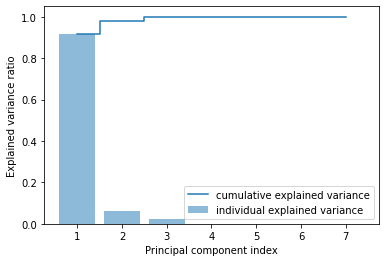

In [57]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(pca.explained_variance_)
print(tot)
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(len(var_exp))
# plot explained variances
plt.bar(range(1,8), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,8), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

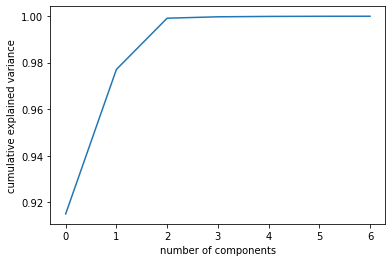

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Meter B
Contains 92 instances of diagnostic parameters for a 4-path liquid USM. It has 52 attributes (features) and 3 classes: \
(1) -- Profile factor \
(2) -- Symmetry \
(3) -- Crossflow \
(4) -- Swirl angle \
(5)-(8) -- Flow velocity in each of the four paths \
(9) -- Average flow velocity in all four paths \
(10)-(13) -- Speed of sound in each of the four paths \
(14) -- Average speed of sound in all four paths \
(15)-(22) -- Signal strength at both ends of each of the four paths \
(23)-(26) -- Turbulence in each of the four paths \
(27) -- Meter performance \
(28)-(35) -- Signal quality at both ends of each of the four paths \
(36)-(43) -- Gain at both ends of each of the four paths \
(44)-51 -- Transit time at both ends of each of the four paths \
(52) -- Class attribute or health state of meter: 1,2,3 \

In [59]:
meter_b_df = pd.read_csv("./dataset/Meter B", sep="\t", header=None)
meter_b_df.columns = [
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Swirl Angle',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Average flow velocity in all four paths',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Average Speed of Sound',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Turbulence 1',
    'Turbulence 2',
    'Turbulence 3',
    'Turbulence 4',
    'Meter Performance',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class attribute/Health State'
]
meter_b_df

,Profile Factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Meter Performance,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class attribute/Health State
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,9.038944,4.426833,4.504556,9.241222,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,1
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,9.030167,4.284000,4.597500,9.166444,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,1
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,9.780722,4.612000,4.544778,10.231167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,1
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,9.749389,4.835333,4.749278,10.945056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,1
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,9.602333,4.479889,4.716833,9.984056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2.418111,0.000000,0.000000,0.0000,5.332300,6.662456,6.288444,0.000000,5.922272,1550.598167,1514.837722,1516.918111,0.000000,1527.452111,126.551166,188.576672,1547.186278,2372.372333,609.580089

In [60]:
#Get average values
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 90)
signal = meter_b_df.loc[: , 'Signal Strength 1':'Signal Strength 8']
signalQuality = meter_b_df.loc[: , 'Signal Quality 1':'Signal Quality 8']
Turbulence = meter_b_df.loc[: , 'Turbulence 1':'Turbulence 4']
gain = meter_b_df.loc[: , 'Gain at both ends 1':'Gain at both ends 8']
time = meter_b_df.loc[: , 'Transit Time 1':'Transit Time 8']
meter_b_df['Average Signal Strength'] = signal.mean(axis=1)
meter_b_df['Average signal Quality'] = signalQuality.mean(axis=1)
meter_b_df['Average Turbulence'] = Turbulence.mean(axis=1)
meter_b_df['Average Gain at both ends'] = gain.mean(axis=1)
meter_b_df['Average Transit Time'] = time.mean(axis=1)

meter_b_df


,Profile Factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Meter Performance,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class attribute/Health State,Average Signal Strength,Average signal Quality,Average Turbulence,Average Gain at both ends,Average Transit Time
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,9.038944,4.426833,4.504556,9.241222,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,1,4883.004861,100.000000,6.802889,51.475000,102.135383
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,9.030167,4.284000,4.597500,9.166444,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,1,4880.964583,100.000000,6.769528,51.475000,102.143804
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,9.780722,4.612000,4.544778,10.231167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,1,4859.806944,100.000000,7.292167,51.475000,102.141860
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,9.749389,4.835333,4.749278,10.945056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,1,4857.486806,100.000000,7.569764,51.475000,102.137063
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,9.602333,4.479889,4.716833,9.984056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,1,4855.343056,100.000000,7.195778,51.475000,102.139019
...,...,...,...,...,...,...,.

In [61]:
#reindex column and take out 0s
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 90)
column_names = [  'Profile Factor',
                    'Symmetry',
                    'Crossflow',
                    'Swirl Angle',
                    'Flow Velocity 1',
                    'Flow Velocity 2',
                    'Flow Velocity 3',
                    'Flow Velocity 4',
                    'Average flow velocity in all four paths',
                    'Speed of Sound 1',
                    'Speed of Sound 2',
                    'Speed of Sound 3',
                    'Speed of Sound 4',
                    'Average Speed of Sound',
                    'Signal Strength 1',
                    'Signal Strength 2',
                    'Signal Strength 3',
                    'Signal Strength 4',
                    'Signal Strength 5',
                    'Signal Strength 6',
                    'Signal Strength 7',
                    'Signal Strength 8',
                    'Average Signal Strength',
                    'Turbulence 1',
                    'Turbulence 2',
                    'Turbulence 3',
                    'Turbulence 4',
                    'Average Turbulence',
                    'Meter Performance',
                    'Signal Quality 1',
                    'Signal Quality 2',
                    'Signal Quality 3',
                    'Signal Quality 4',
                    'Signal Quality 5',
                    'Signal Quality 6',
                    'Signal Quality 7',
                    'Signal Quality 8',
                    'Average signal Quality',
                    'Gain at both ends 1',
                    'Gain at both ends 2',
                    'Gain at both ends 3',
                    'Gain at both ends 4',
                    'Gain at both ends 5',
                    'Gain at both ends 6',
                    'Gain at both ends 7',
                    'Gain at both ends 8',
                    'Average Gain at both ends',
                    'Transit Time 1',
                    'Transit Time 2',
                    'Transit Time 3',
                    'Transit Time 4',
                    'Transit Time 5',
                    'Transit Time 6',
                    'Transit Time 7',
                    'Transit Time 8',
                    'Average Transit Time',
                    'Class attribute/Health State']
meter_b_df = meter_b_df.reindex(columns=column_names)
meter_b_df = meter_b_df[~(meter_b_df == 0).any(axis=1)]
meter_b_df

,Profile Factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Average Signal Strength,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Average Turbulence,Meter Performance,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Average signal Quality,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Average Gain at both ends,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Average Transit Time,Class attribute/Health State
0,1.185089,1.028128,1.016478,0.150000,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,4883.004861,9.038944,4.426833,4.504556,9.241222,6.802889,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,102.135383,1
1,1.191806,1.033750,1.019411,0.217000,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,4880.964583,9.030167,4.284000,4.597500,9.166444,6.769528,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,102.143804,1
2,1.181983,1.028089,1.020994,0.088900,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,4859.806944,9.780722,4.612000,4.544778,10.231167,7.292167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,102.141860,1
3,1.182761,1.028783,1.021072,0.117000,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,4857.486806,9.749389,4.835333,4.749278,10.945056,7.569764,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,102.137063,1
4,1.182272,1.028922,1.021350,0.022200,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,4855.343056,9.602333,4.479889,4.716833,9.984056,7.195778,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,102.139019,1
5,1.177961,1.030906

In [62]:
#check for duplicate
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
dups = meter_b_df.duplicated()
dups


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
dtype: bool

In [63]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
meter_b_df['Class attribute/Health State'] = meter_b_df['Class attribute/Health State'].replace([3],4)
meter_b_df

,Profile Factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average flow velocity in all four paths,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Average Signal Strength,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Average Turbulence,Meter Performance,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Average signal Quality,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Average Gain at both ends,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Average Transit Time,Class attribute/Health State
0,1.185089,1.028128,1.016478,0.150000,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,4883.004861,9.038944,4.426833,4.504556,9.241222,6.802889,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,102.135383,1
1,1.191806,1.033750,1.019411,0.217000,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,4880.964583,9.030167,4.284000,4.597500,9.166444,6.769528,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,102.143804,1
2,1.181983,1.028089,1.020994,0.088900,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,4859.806944,9.780722,4.612000,4.544778,10.231167,7.292167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,102.141860,1
3,1.182761,1.028783,1.021072,0.117000,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,4857.486806,9.749389,4.835333,4.749278,10.945056,7.569764,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,102.137063,1
4,1.182272,1.028922,1.021350,0.022200,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,4855.343056,9.602333,4.479889,4.716833,9.984056,7.195778,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,51.475000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,102.139019,1
5,1.177961,1.030906

In [64]:
#PCA
numComponents = 13
pca = PCA(n_components=numComponents)
pca.fit(meter_b_df)
projected = pca.transform(meter_b_df)
projected_1 = pd.DataFrame(projected,columns=['Profile Factor',
                    'Symmetry',
                    'Crossflow',
                    'Swirl Angle',
                    'Average flow velocity in all four paths',
                    'Average Speed of Sound',
                    'Average Signal Strength',
                    'Average Turbulence',
                    'Meter Performance',
                    'Average signal Quality',
                    'Average Gain at both ends',
                    'Average Transit Time',
                    'Class attribute/Health State'],index=range(1,78))
projected_1

,Profile Factor,Symmetry,Crossflow,Swirl Angle,Average flow velocity in all four paths,Average Speed of Sound,Average Signal Strength,Average Turbulence,Meter Performance,Average signal Quality,Average Gain at both ends,Average Transit Time,Class attribute/Health State
1,-1516.256049,-2181.986668,-976.555155,57.436095,104.053548,125.113668,-145.402700,11.786637,-15.834581,9.581779,16.337649,3.974655,-3.047969
2,-1513.845708,-2176.069533,-970.218197,58.525544,103.525584,125.987988,-145.620223,12.877719,-16.558624,10.144469,14.219820,3.859825,-3.018534
3,-1473.327442,-2127.830904,-970.193811,37.361167,104.330210,65.710281,-89.251860,-1.105417,-11.911928,7.724138,11.272593,2.037648,-1.668002
4,-1469.339007,-2122.850549,-963.547431,35.012293,102.907502,63.035000,-88.291283,4.141073,-8.579237,6.802475,8.208848,1.984819,-1.378599
5,-1462.601485,-2120.726370,-963.946522,36.526803,102.812623,63.310048,-88.124460,3.374896,-10.238174,7.376893,7.825320,2.278888,-1.650821
6,-1459.315945,-2121.148557,-965.714351,35.856496,102.610043,65.202925,-88.984396,1.839274,-12.086319,7.771010,9.046063,1.704090,-1.426885
7,-1459.018679,-2121.149210,-963.310474,32.503226,101.775845,66.588985,-88.860323,-0.149616,-14.391461,8.531098,12.072573,2.110065,-1.439146
8,-1458.279915,-2121.417312,-960.591987,29.886586,101.016518,66.028987,-88.238628,0.159197,-13.125114,8.110738,13.186358,2.164444,-1.630358
9,-1449.879763,-2108.486027,-940.283386,14.859060,101.230299,25.309563,-47.186428,-11.327741,-2.753927,4.409962,7.557594,0.824509,-0.314076
10,-1454.479214,-2094.742644,-934.293596,-6.067084,103.587177,-27.515454,-0.384498,-16.009466,14.898286,-1.527032,-1.495767,-0.651884,0.822247


### Meter D
Contains 180 instances of diagnostic parameters for a 4-path liquid USM. It has 44 attributes(features) and 4 classes: \
(1) -- Profile factor \
(2) -- Symmetry \
(3) -- Crossflow \
(4)-(7) -- Flow velocity in each of the four paths \
(8)-(11) -- Speed of sound in each of the four paths \
(12)-(19) -- Signal strength at both ends of each of the four paths \
(20)-(27) -- Signal quality at both ends of each of the four paths \
(28)-(35) -- Gain at both ends of each of the four paths \
(36)-(43) -- Transit time at both ends of each of the four paths \
(44) -- Class attribute or health state of meter: 1,2,3,4 \

In [2]:
meter_d_df = pd.read_csv("./dataset/Meter D", sep="\t", header=None)
meter_d_df.columns = [
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class attribute/Health State'
]
meter_d_df


,Profile Factor,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,...,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class attribute/Health State
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,1485.805556,1485.930556,1485.941667,...,-0.700000,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,1
1,1.089401,0.997778,0.998012,3.399444,3.711111,3.711944,3.414444,1486.163889,1486.302778,1486.302778,...,-0.700000,124.171944,123.831667,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,1
2,1.079671,1.006056,0.999027,3.438056,3.714722,3.689722,3.420000,1486.322222,1486.452778,1486.455556,...,-0.700000,124.160000,123.818056,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,1
3,1.090834,1.013194,0.994911,3.399444,3.725000,3.660556,3.371111,1486.455556,1486.575000,1486.583333,...,-0.700000,124.144722,123.808611,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,1
4,1.093816,1.009716,1.003622,3.398889,3.702778,3.681389,3.351944,1486.600000,1486.725000,1486.730556,...,-0.700000,124.134444,123.797500,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.593220,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,1513.505556,1507.080556,1494.355556,...,44.600000,121.266111,122.244167,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,4
176,0.173768,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,1521.897222,1474.400000,1500.705556,...,44.600000,121.082222,121.059167,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,4
177,0.049027,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,1518.072222,1439.802778,1512.719444,...,44.169444,121.298889,121.370278,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,4
178,-0.053056,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1487.083333,1422.211111,1484.836111,...,44.100000,125.552500,122.318333,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,4


In [3]:
#get average values
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 90)
velocity = meter_d_df.loc[: , 'Flow Velocity 1':'Flow Velocity 4']
soundspeed = meter_d_df.loc[: , 'Speed of Sound 1':'Speed of Sound 4']
signal = meter_d_df.loc[: , 'Signal Strength 1':'Signal Strength 8']
signalQuality = meter_d_df.loc[: , 'Signal Quality 1':'Signal Quality 8']
gain = meter_d_df.loc[: , 'Gain at both ends 1':'Gain at both ends 8']
time = meter_d_df.loc[: , 'Transit Time 1':'Transit Time 8']
meter_d_df['Average Velocity'] = velocity.mean(axis=1)
meter_d_df['Average Speed of Sound'] = soundspeed.mean(axis=1)
meter_d_df['Average Signal Strength'] = signal.mean(axis=1)
meter_d_df['Average signal Quality'] = signalQuality.mean(axis=1)
meter_d_df['Average Gain at both ends'] = gain.mean(axis=1)
meter_d_df['Average Transit Time'] = time.mean(axis=1)

meter_d_df

,Profile Factor,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Class attribute/Health State,Average Velocity,Average Speed of Sound,Average Signal Strength,Average signal Quality,Average Gain at both ends,Average Transit Time
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,1485.805556,1485.930556,1485.941667,1485.780556,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3543.972222,3457.944444,3367.583333,3401.805556,3711.222222,3707.138889,3643.555556,3590.777778,0.5,0.5,0.2,0.2,1.4,1.4,-0.700000,-0.700000,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,1,2.469375,1485.864583,65.75,3553.000000,0.350000,137.750590
1,1.089401,0.997778,0.998012,3.399444,3.711111,3.711944,3.414444,1486.163889,1486.302778,1486.302778,1486.130556,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3546.805556,3412.583333,3256.666667,3322.277778,3716.055556,3670.777778,3622.222222,3580.305556,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.171944,123.831667,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,1,3.559236,1486.225000,65.75,3515.961806,0.300000,137.717604
2,1.079671,1.006056,0.999027,3.438056,3.714722,3.689722,3.420000,1486.322222,1486.452778,1486.455556,1486.297222,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3557.277778,3413.333333,3267.000000,3330.722222,3693.666667,3677.583333,3620.027778,3574.083333,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.160000,123.818056,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,1,3.565625,1486.381944,65.75,3516.711806,0.300000,137.703299
3,1.090834,1.013194,0.994911,3.399444,3.725000,3.660556,3.371111,1486.455556,1486.575000,1486.583333,1486.416667,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3541.111111,3433.666667,3262.000000,3329.611111,3702.055556,3677.194444,3635.027778,3579.694444,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.144722,123.808611,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,1,3.539028,1486.507639,65.75,3520.045139,0.300000,137.690903
4,1.093816,1.009716,1.003622,3.398889,3.702778,3.681389,3.351944,1486.600000,1486.725000,1486.730556,1486.555556,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,3541.333333,3416.888889,3273.472222,3320.833333,3690.138889,3690.500000,3615.833333,3564.972222,0.5,0.5,0.0,0.0,1.4,1.4,-0.700000,-0.700000,124.134444,123.797500,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,1,3.533750,1486.652778,65.75,3514.246528,0.300000,137.677569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.593220,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,1513.505556,1507.080556,1494.355556,1567.686111,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,1556.694444,1555.250000,1781.333333,1886.944444,1968.166667,1943.805556,1771.861111,1724.166667,45.9,45.9,44.2,44.2,44.8,44.8,44.600000,44.600000,121.266111,122.244167,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,4,-0.550000,1520.656944,55.00,1773.527778,44.875000,135.083819
176,0.173768,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,1521.897222,1474.400000,1500.705556,1555.538889,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,1569.472222,1627.333333,1788.111111,1969.111111,1953.583333,1929.722222,1723.3611

In [4]:
#reindex columns and take out 0
column_names = [
            'Profile Factor',
            'Symmetry',
            'Crossflow',
            'Flow Velocity 1',
            'Flow Velocity 2',
            'Flow Velocity 3',
            'Flow Velocity 4',
            'Average Velocity',
            'Speed of Sound 1',
            'Speed of Sound 2',
            'Speed of Sound 3',
            'Speed of Sound 4',
            'Average Speed of Sound',
            'Signal Strength 1',
            'Signal Strength 2',
            'Signal Strength 3',
            'Signal Strength 4',
            'Signal Strength 5',
            'Signal Strength 6',
            'Signal Strength 7',
            'Signal Strength 8',
            'Average Signal Strength',
            'Signal Quality 1',
            'Signal Quality 2',
            'Signal Quality 3',
            'Signal Quality 4',
            'Signal Quality 5',
            'Signal Quality 6',
            'Signal Quality 7',
            'Signal Quality 8',
            'Average signal Quality',
            'Gain at both ends 1',
            'Gain at both ends 2',
            'Gain at both ends 3',
            'Gain at both ends 4',
            'Gain at both ends 5',
            'Gain at both ends 6',
            'Gain at both ends 7',
            'Gain at both ends 8',
            'Average Gain at both ends',
            'Transit Time 1',
            'Transit Time 2',
            'Transit Time 3',
            'Transit Time 4',
            'Transit Time 5',
            'Transit Time 6',
            'Transit Time 7',
            'Transit Time 8',
            'Average Transit Time',
            'Class attribute/Health State'
]
meter_d_df = meter_d_df.reindex(columns=column_names)
meter_d_df = meter_d_df[~(meter_d_df == 0).any(axis=1)]
meter_d_df

,Profile Factor,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Average Velocity,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Average Speed of Sound,Signal Strength 1,Signal Strength 2,Signal Strength 3,Signal Strength 4,Signal Strength 5,Signal Strength 6,Signal Strength 7,Signal Strength 8,Average Signal Strength,Signal Quality 1,Signal Quality 2,Signal Quality 3,Signal Quality 4,Signal Quality 5,Signal Quality 6,Signal Quality 7,Signal Quality 8,Average signal Quality,Gain at both ends 1,Gain at both ends 2,Gain at both ends 3,Gain at both ends 4,Gain at both ends 5,Gain at both ends 6,Gain at both ends 7,Gain at both ends 8,Average Gain at both ends,Transit Time 1,Transit Time 2,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Average Transit Time,Class attribute/Health State
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,2.469375,1485.805556,1485.930556,1485.941667,1485.780556,1485.864583,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3543.972222,3457.944444,3367.583333,3401.805556,3711.222222,3707.138889,3643.555556,3590.777778,3553.000000,0.5,0.5,0.2,0.2,1.4,1.4,-0.700000,-0.700000,0.350000,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,137.750590,1
18,1.098661,1.008227,1.000613,2.385833,2.618611,2.599722,2.363889,2.492014,1484.716667,1484.836111,1484.847222,1484.686111,1484.771528,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3595.861111,3519.666667,3342.555556,3391.138889,3554.777778,3524.361111,3673.027778,3652.833333,3531.777778,0.6,0.6,0.2,0.2,1.0,1.0,-0.700000,-0.700000,0.275000,124.241111,124.003889,151.728611,151.386389,151.673056,151.331389,124.344722,124.107222,137.852049,1
19,1.088503,1.010238,1.001035,3.362222,3.654444,3.622500,3.323056,3.490556,1485.033333,1485.144444,1485.147222,1484.994444,1485.079861,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3588.833333,3472.000000,3341.194444,3392.472222,3534.444444,3501.472222,3655.222222,3617.722222,3512.920139,0.6,0.6,0.2,0.2,1.0,1.0,-0.700000,-0.700000,0.275000,124.262778,123.928889,151.763889,151.288056,151.706944,151.233889,124.364722,124.036111,137.823160,1
20,1.099132,1.002281,0.991126,3.299167,3.658333,3.619444,3.322222,3.474792,1485.302778,1485.425000,1485.430556,1485.261111,1485.354861,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3590.194444,3489.055556,3333.666667,3389.055556,3523.750000,3496.333333,3655.694444,3619.138889,3512.111111,0.6,0.6,0.2,0.2,1.0,1.0,-0.700000,-0.700000,0.275000,124.239722,123.906944,151.738889,151.259167,151.678889,151.206667,124.343056,124.011667,137.798125,1
21,1.095847,1.014218,0.995411,3.330556,3.664167,3.599167,3.297500,3.472847,1485.533333,1485.641667,1485.644444,1485.488889,1485.577083,66.0,66.0,66.0,66.0,65.0,65.0,66.0,66.0,65.75,3601.722222,3474.361111,3335.111111,3402.250000,3538.027778,3496.472222,3658.222222,3611.083333,3514.656250,0.6,0.6,0.2,0.2,1.0,1.0,-0.700000,-0.700000,0.275000,124.220833,123.887222,151.712778,151.238333,151.656389,151.184444,124.325556,123.993889,137.777431,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,4.593220,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,-0.550000,1513.505556,1507.080556,1494.355556,1567.686111,1520.656944,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.00,1556.694444,1555.250000,1781.333333,1886.944444,1968.166667,1943.805556,1771.861111,1724.166667,1773.527778,45.9,45.9,44.2,44.2,44.8,44.8,44.600000,44.600000,44.875000,121.266111,122.244167,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,135.083819,4
176,0.173768,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,-0.853264,1521.897222,1474.400000,1500.705556,1555.538889,1513.135417,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.00,1569.472222,1627.333333,1788.111111,1969.111111,1

In [5]:
# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 90)
dups = meter_d_df.duplicated()
dups

0      False
18     False
19     False
20     False
21     False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 127, dtype: bool

In [8]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 10
pca = PCA(n_components=numComponents)
pca.fit(meter_d_df)
projected = pca.transform(meter_d_df)
projected_1 = pd.DataFrame(projected,columns=[
            'Profile Factor',
            'Symmetry',
            'Crossflow',
            'Average Velocity',
            'Average Speed of Sound',
            'Average Signal Strength',
            'Average signal Quality',
            'Average Gain at both ends',
            'Average Transit Time',
            'Class attribute/Health State'],index=range(1,128))
projected_1

,Profile Factor,Symmetry,Crossflow,Average Velocity,Average Speed of Sound,Average Signal Strength,Average signal Quality,Average Gain at both ends,Average Transit Time,Class attribute/Health State
1,-1518.845279,138.576278,-103.852492,51.230289,37.133161,-4.017208,-84.105457,-2.758166,4.644099,1.874567
2,-1468.897736,198.579694,-274.259095,-108.202716,-47.504115,17.733137,-56.472778,30.689841,13.987352,-3.960738
3,-1408.153301,202.468010,-285.421655,-99.817888,-29.944583,-10.535828,-46.136260,24.712194,9.675816,-3.790658
4,-1406.732602,203.934133,-288.111014,-115.184897,-38.829224,2.573649,-45.796370,22.933508,10.839874,-4.506675
5,-1410.922590,193.792943,-287.128591,-103.795385,-36.738634,-16.331567,-32.938595,18.267848,8.619703,-3.846396
...,...,...,...,...,...,...,...,...,...,...
123,3523.705590,1913.696020,239.411075,38.761799,85.073376,-84.968184,-31.299192,-20.087952,8.238490,24.776237
124,3527.973446,1825.984239,202.741204,38.017537,50.183060,-23.156004,-1.842009,-13.431821,-11.102442,-5.591987
125,3529.628918,1682.968651,292.074022,46.289686,13.927022,42.816250,36.674742,-21.982426,-22.840666,-35.145475
126,3401.904386,1484.984854,342.042424,-24.787090,-75.204654,132.206509,75.868046,-36.542018,-32.750580,-42.812230
